# **LangChain**

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

## **Summarize messages**

In [32]:
from langchain.agents import create_agent
from pprint import pprint
from langgraph.checkpoint.memory import InMemorySaver
from langchain.agents.middleware import SummarizationMiddleware

In [4]:
agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),

    middleware=[
        SummarizationMiddleware(
            model="gpt-4o-mini",
            trigger=("tokens", 100),
            keep=("messages", 1)
        )
    ]

)

In [5]:
from langchain.messages import HumanMessage, AIMessage
from pprint import pprint

In [6]:
response = agent.invoke(
    {"messages": [
        HumanMessage(content="What is the capital of the moon?"),
        AIMessage(content="The capital of the moon is Lunapolis."),
        HumanMessage(content="What is the weather in Lunapolis?"),
        AIMessage(content="Skies are clear, with a high of 120C and a low of -100C."),
        HumanMessage(content="How many cheese miners live in Lunapolis?"),
        AIMessage(content="There are 100,000 cheese miners living in Lunapolis."),
        HumanMessage(content="Do you think the cheese miners' union will strike?"),
        AIMessage(content="Yes, because they are unhappy with the new president."),
        HumanMessage(content="If you were Lunapolis' new president how would you respond to the cheese miners' union?"),
        ]},
    {"configurable": {"thread_id": "1"}}
)

pprint(response)

{'messages': [HumanMessage(content='Here is a summary of the conversation to date:\n\nThe capital of the moon is Lunapolis. The weather in Lunapolis features clear skies, with a high of 120C and a low of -100C. There are 100,000 cheese miners living in Lunapolis, and they may strike due to dissatisfaction with the new president.', additional_kwargs={}, response_metadata={}, id='d7bb2083-66cc-483b-afc5-dff96599b89b'),
              HumanMessage(content="If you were Lunapolis' new president how would you respond to the cheese miners' union?", additional_kwargs={}, response_metadata={}, id='18430be5-3a4a-4aa4-b949-36019dc5e064'),
              AIMessage(content='If I were Lunapolis’ new president, I’d treat the Cheese Miners’ Union as a respected partner and aim for a swift, fair, and sustainable resolution. Here’s a practical plan I would follow.\n\nKey principles\n- Safety first: ensure every worker goes home safe. Any concessions must not compromise safety.\n- Respect and transparency:

In [7]:
print(response["messages"][-1].content)

If I were Lunapolis’ new president, I’d treat the Cheese Miners’ Union as a respected partner and aim for a swift, fair, and sustainable resolution. Here’s a practical plan I would follow.

Key principles
- Safety first: ensure every worker goes home safe. Any concessions must not compromise safety.
- Respect and transparency: open dialogue, no surprises, clear data on costs, benefits, and constraints.
- Shared prosperity: fair compensation, benefits, and working conditions linked to productivity and risk.
- Predictability and accountability: establish concrete timelines, measurable goals, and a clear dispute-resolution process.
- Preserve essential services: keep cheese production steady while negotiations continue.

Immediate actions (first 2–3 weeks)
- Create a joint Cheese Miners Negotiation Council with union reps, management, and a neutral mediator (if requested).
- Publicly acknowledge the miners’ concerns and commit to a good-faith negotiating process.
- Freeze or limit discipl

## **Trim/delete messages**

In [25]:
from typing import Any
from langchain.agents import AgentState
from langchain.messages import RemoveMessage
from langgraph.runtime import Runtime
from langchain.agents.middleware import before_agent
from langchain.messages import ToolMessage

In [26]:
@before_agent
def trim_message(state: AgentState, runtime: Runtime) -> dict[str, Any]:
    """Remove all the tool message from the state"""

    messages = state["messages"]

    tool_messages = [m for m in messages if isinstance(m, ToolMessage)]
    return { "messages": [RemoveMessage(id=m.id) for m in tool_messages] }

In [30]:
agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),
    middleware=[trim_message],
)

In [ ]:
response = agent.invoke(
    {"messages": [
        HumanMessage(content="My device won't turn on. What should I do?"),
        ToolMessage(content="blorp-x7 initiating diagnostic ping…", tool_call_id="1"),
        AIMessage(content="Is the device plugged in and turned on?"),
        HumanMessage(content="Yes, it's plugged in and turned on."),
        ToolMessage(content="temp=42C voltage=2.9v … greeble complete.", tool_call_id="2"),
        AIMessage(content="Is the device showing any lights or indicators?"),
        HumanMessage(content="What's the temperature of the device?")
        ]},
    {"configurable": {"thread_id": "2"}}
)



In [34]:
pprint(response)

{'messages': [HumanMessage(content="My device won't turn on. What should I do?", additional_kwargs={}, response_metadata={}, id='1bc5d3ec-6312-4ea9-9bfb-759f2d599cbf'),
              AIMessage(content='Is the device plugged in and turned on?', additional_kwargs={}, response_metadata={}, id='02689c34-1366-42c6-8903-9046940da853'),
              HumanMessage(content="Yes, it's plugged in and turned on.", additional_kwargs={}, response_metadata={}, id='9f1a7966-cfa9-4506-a1cc-ca0f8d6cf5bd'),
              AIMessage(content='Is the device showing any lights or indicators?', additional_kwargs={}, response_metadata={}, id='0c97af2f-9c30-4d25-8028-11f08235031e'),
              HumanMessage(content="What's the temperature of the device?", additional_kwargs={}, response_metadata={}, id='dd799413-0dc7-44df-ba44-e0b171a4be8f'),
              AIMessage(content='I can’t read your device’s internal temperature, especially since I can’t access sensors and you mentioned it won’t turn on. If it’s curre

In [33]:

print(response["messages"][-1].content)

I can’t read your device’s internal temperature, especially since I can’t access sensors and you mentioned it won’t turn on. If it’s currently powered, you can check temps with software. If it’s off, you can only gauge surface heat.

What you can do right now
- Safe surface check (if it’s off or won’t boot): feel near the vents for heat. If it’s very hot to the touch (hot after just a short moment), let it cool before trying again.
- If it’s on and you can access it:
  - Windows: install a temperature monitoring app like HWMonitor or Core Temp, then read CPU/GPU temps.
  - macOS: apps like iStat Menus or Macs Fan Control can show temps; otherwise you may use BIOS/UEFI hardware monitors on startup.
  - Android/iOS devices: apps like CPU-Z (Android) or similar can show temps while on.
- Exterior checks: ensure vents aren’t blocked by dust, a sleeve, or bedding. A dusty or clogged vent can cause overheating.

If the device won’t turn on
- Unplug from power, hold the power button 10–20 sec

# **LangGraph**

In [87]:
from langgraph.graph import START, StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage, SystemMessage, HumanMessage, AIMessage, ToolMessage
from langchain.agents.middleware import SummarizationMiddleware
from langchain_openai import ChatOpenAI
from typing import Annotated, List
from typing_extensions import TypedDict
import tiktoken

In [57]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [88]:
summarizer = SummarizationMiddleware(
    model="gpt-4o-mini",
    trigger=("tokens", 100),
    keep=("messages", 1)
)

In [58]:
class ChatState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

In [59]:
def count_tokens(messages: List[BaseMessage]) -> int:
    encoding = tiktoken.get_encoding("cl100k_base")
    return sum(len(encoding.encode(m.content if hasattr(m, 'content') else str(m))) for m in messages)

In [89]:
def summarization_middleware_node(state: ChatState):
    updated_state = summarizer.before_model(state, runtime=None)
    return updated_state

In [90]:
def chat_node(state: ChatState):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

In [91]:
# Build graph
graph = StateGraph(ChatState)
graph.add_node("summarization", summarization_middleware_node)
graph.add_node("llm", chat_node)
graph.add_node("tools", ToolNode([]))

graph.add_edge(START, "summarization")
graph.add_edge("summarization", "llm")
graph.add_conditional_edges("llm", tools_condition)
graph.add_edge("llm", END)

workflow = graph.compile(checkpointer=InMemorySaver())

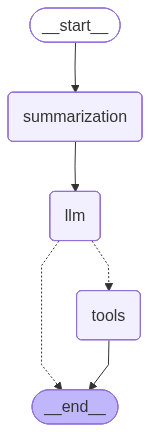

In [92]:
workflow

In [93]:
# Test
test_messages = [
    HumanMessage(content="Check my device status"),
    AIMessage(content="Running diagnostics...", tool_calls=[{"id": "1", "name": "diagnostic", "args": {}}]),
    ToolMessage(content="temp=42C voltage=2.9v status=normal", tool_call_id="1"),
    HumanMessage(content="Is 42C normal?"),
    AIMessage(content="Yes, 42C is safe for most devices."),
    HumanMessage(content="What about 80C?"),
    HumanMessage(content="And if it won't turn on?"),
    HumanMessage(content="Also check battery"),
]

response = workflow.invoke({"messages": test_messages}, config={"configurable": {"thread_id": "1"}})

In [94]:
# CORRECT WAY TO GET ANSWER
final_msg = response["messages"][-1]
if isinstance(final_msg, AIMessage):
    print("Assistant:", final_msg.content)
else:
    print("No response (check model/token limit)")

Assistant: To check the battery status of your device, you can typically follow these steps, depending on the type of device you have:

1. **For Smartphones/Tablets:**
   - Go to the settings menu.
   - Look for "Battery" or "Battery & Performance."
   - Check the battery health or status, which may show the current charge level, health percentage, and any usage statistics.

2. **For Laptops:**
   - On Windows, you can use the command prompt to generate a battery report. Type `powercfg /batteryreport` and follow the instructions to view the report.
   - On macOS, hold the Option key and click the Apple menu, then select "System Information" and look for "Power" to see battery details.

3. **For Other Devices:**
   - Refer to the user manual or settings menu for battery information.
   - Some devices may have a dedicated app or diagnostic tool to check battery status.

If you notice any issues, such as rapid discharge, swelling, or overheating, it may be time to replace the battery. If 

In [95]:
pprint(response['messages'])

[HumanMessage(content="Here is a summary of the conversation to date:\n\nUser checked their device status and received a diagnostic report indicating the temperature was 42C, voltage 2.9v, and status normal. User inquired if 42C is a normal temperature and was informed that it is safe for most devices. User also asked about 80C and what to do if the device won't turn on.", additional_kwargs={}, response_metadata={}, id='1de470ab-e8aa-4145-a95f-96d437bf928f'),
 HumanMessage(content='Also check battery', additional_kwargs={}, response_metadata={}, id='12f0ca44-7fd9-4093-ad50-c7cd09b54517'),
 AIMessage(content='To check the battery status of your device, you can typically follow these steps, depending on the type of device you have:\n\n1. **For Smartphones/Tablets:**\n   - Go to the settings menu.\n   - Look for "Battery" or "Battery & Performance."\n   - Check the battery health or status, which may show the current charge level, health percentage, and any usage statistics.\n\n2. **For L

In [55]:
response

{'messages': [HumanMessage(content='Check my device status', additional_kwargs={}, response_metadata={}, id='97c93502-4b88-4ec4-a173-9dacd713785d'),
  AIMessage(content='Running diagnostics...', additional_kwargs={}, response_metadata={}, id='3fb42bea-e86d-4083-ad48-c7ff38ffca27', tool_calls=[{'name': 'run_diagnostic', 'args': {}, 'id': 'diag_1', 'type': 'tool_call'}]),
  ToolMessage(content='temp=42C voltage=2.9v status=normal', id='f4ee7c3d-483a-4bc5-8c64-97d4563ed18b', tool_call_id='diag_1'),
  HumanMessage(content='Is 42C normal?', additional_kwargs={}, response_metadata={}, id='9b928945-8af4-4c03-9e1e-bb05f7130b33'),
  AIMessage(content='Yes, 42C is safe for most devices.', additional_kwargs={}, response_metadata={}, id='18fe26f7-a61d-41d3-b158-88d5a33f4d57'),
  HumanMessage(content='What about 80C?', additional_kwargs={}, response_metadata={}, id='20f39903-418e-4d99-a577-bbc8163df9b9'),
  HumanMessage(content="And what if it's not turning on?", additional_kwargs={}, response_meta

In [101]:
Markdown(response["messages"][-1].content)

['The temperature of my device is 42C. What should I do?',
 "My device won't turn on. What should I do?",
 'Is the device plugged in and turned on?',
 "Yes, it's plugged in and turned on.",
 'Is the device showing any lights or indicators?',
 "What's the temperature of the device?",
 'If you’re referring to the same reading you mentioned earlier, the temperature is 42°C. That’s warm but not usually dangerous by itself. If the device won’t turn on, overheating could have triggered a protective shutdown, or there could be another issue.\n\nWhat you can do now:\n- Power down and unplug the device. If possible, remove the battery and let it cool for 15–30 minutes in a well-ventilated area.\n- Check vents and fans. Look for dust blocking the intake/exhaust and gently clean with compressed air if you can.\n- Make sure the device has good airflow. Don’t use it on a bed, couch, or any soft surface.\n- After it’s cooled, try turning it on again. If it still won’t start, try a power cycle: hold 